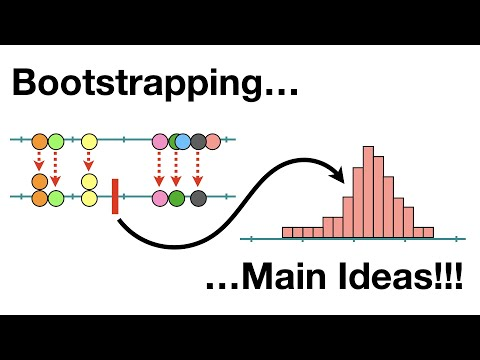

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

<h1>Question 1</h1>
<h2>Difference between Std. Error of the Mean vs. Std. Deviation of the original data</h2> 

The standard deviation of the original data looks to represent how spread all of the original data.
point are. This gives us the spread of the data points, whereas the standard error of the mean looks to give
us the spread of something different. The reason that the standard error of the mean is not the same
is because it looks to measure the uncertainty of the mean, not the original data points. This is also why the SEM is
only measured in the bootstrapped data, for the SEM's sake, we don't take much into account regarding where exactly the original data points are, we look at the distribution of possible sample means.


<h1>Question 2 - 3</h1> 
<h2>How to create a 95% confidence interval on bootstrapped data.</h2>

One way to get the 95% confidence interval is to simply retrieve the 2.5th percentile and the 97.5th percentile of the data.
This is because we'll exclude 2.5% of the lowest data and 2.5% of the highest data, taking away 5% and leaving a 95% confidence interval. Alternatively, if we want to use the Std. Error of the Mean, then we can use the Standard Deviation and Z-Scores in a formula, which has not been covered by course content. In order to find the 2.5th and the 97.5th percentiles, we can use np.quantile

In [ ]:
# GPT Code to find the 95% Confidence Interval
import numpy as np

# Assuming you already have bootstrapped means stored in an array
bootstrapped_means = [...]  # Replace with the array of bootstrapped means

# Calculate the 2.5th and 97.5th percentiles using np.quantile()
lower_bound = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile
upper_bound = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile

# The 95% confidence interval is:
confidence_interval = (lower_bound, upper_bound)

print("95% Confidence Interval:", confidence_interval)

<h1>Question 4</h1>
<h2>Demonstrating the Confidence Interval using Python</h2>

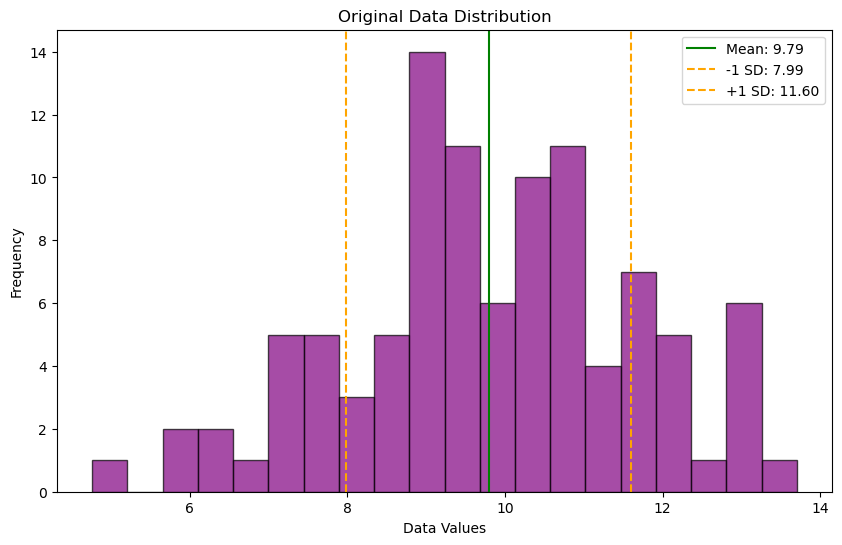

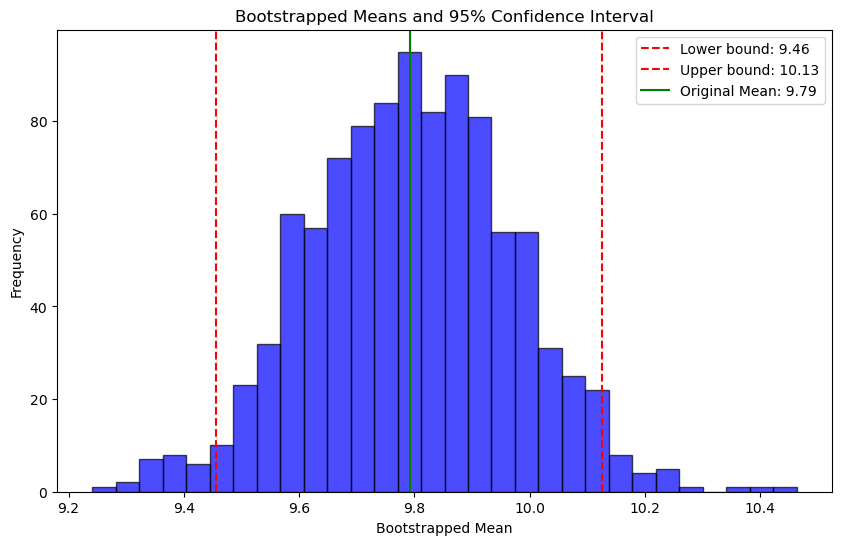

Confidence Interval: (9.4553271502815, 10.125702972880388)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some made-up data
np.random.seed(42)  # For reproducibility
original_data = np.random.normal(loc=10, scale=2, size=100)  # Mean 10, SD 2, 100 data points

# Visualize the original data with a histogram
plt.figure(figsize=(10, 6))

# Plot the histogram of the original data
plt.hist(original_data, bins=20, color='purple', alpha=0.7, edgecolor='black')

# Add mean and standard deviation lines
plt.axvline(x=np.mean(original_data), color='green', linestyle='-', label=f'Mean: {np.mean(original_data):.2f}')
plt.axvline(x=np.mean(original_data) - np.std(original_data), color='orange', linestyle='--', label=f'-1 SD: {np.mean(original_data) - np.std(original_data):.2f}')
plt.axvline(x=np.mean(original_data) + np.std(original_data), color='orange', linestyle='--', label=f'+1 SD: {np.mean(original_data) + np.std(original_data):.2f}')

# Add labels and title
plt.title('Original Data Distribution')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Number of bootstrap samples
B = 1000

# Array to store the bootstrapped means
bootstrapped_means = []

# Bootstrapping
for _ in range(B):
    # Resample with replacement from the original dataset
    bootstrap_sample = np.random.choice(original_data, size=len(original_data), replace=True)
    # Compute the mean of the bootstrap sample
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Convert to numpy array
bootstrapped_means = np.array(bootstrapped_means)

# Compute the 95% confidence interval using np.quantile()
lower_bound = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile
upper_bound = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile
confidence_interval = (lower_bound, upper_bound)

# Visualize the bootstrapped means and the confidence interval
plt.figure(figsize=(10, 6))

# Plot the distribution of the bootstrapped means
plt.hist(bootstrapped_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
plt.axvline(x=np.mean(original_data), color='green', linestyle='-', label=f'Original Mean: {np.mean(original_data):.2f}')

# Add labels and title
plt.title('Bootstrapped Means and 95% Confidence Interval')
plt.xlabel('Bootstrapped Mean')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Output the calculated confidence interval
print("Confidence Interval:", confidence_interval)


<h1>Question 5</h1>
<h2>The roles of a population parameter and samplings</h2>

A population parameter is what we are trying to figure out by sampling data. The population parameter is the goal
and a sampling of the data is a measurement that we can then use to achieve that goal. The confidence interval tries to provide
a reasonable interval wherein the population parameter resides, since we don't know the true mean of the dataset, we aim to be 95% confident in our estimated mean. It is important to note the role of sampling, since we need a way to realistically find out the true mean.

<h1>Question 6</h1>
<h2>Discussing Bootstrapping</h2>

<h3>What is the process of bootstrapping?</h3>

Assume we have a tiny sample of data, let's say that we want to find the average height of the human population.
Bootstrapping is extremely useful for estimating what the true mean is using a small sampling of the population.
It involves taking random resampling (with replacement), this means we take our sample and randomly take a subset of these elements, often repeating certain data points. We take the average of this 'bootstrapping', we do this several times. We then end up with a range of different means, the more we see certain mean values, the more likely the actual mean lies close to it.

<h3>What is the main purpose of bootstrapping?</h3>

Bootstrapping is great for when we want to find a true average for a big population by only taking a small population. It provides suprisingly consistant results that represent a bigger picture from a smaller sample. In real world examples of data collection, it is not always realistic to be able to extract every single data point from a given data set. In a way, bootstrapping is a shortcut in the sense that it requires less resources in sacrifice of more "true" data, but the 95% confidence interval is amazing in a way that works. It's not pure guessing, but it shows more information than resources it requires, only needing a small sample size.

<h3>If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?</h3>

You could first guess the mean, then from your small sample, you run some amount of bootstrapping tests (say: 10000 times). We then check if this value falls within the 95% confidence interval. If it falls outside the interval, then we have to reconsider our hypothesis (or perhaps our sample). To say that our guess lies in the 95% confidence interval means that if we were to run the same experiment in alternate universes with different random conditions, we can be confident in our guess in 95% of them.

<h1>Question 7</h1>
<h2>Discussing the rejection of the null hypothesis</h2>

The reason that the example within the video shown above fails to reject the null hypothesis is because the 95% confidence interval overlaps with the mean of 0. This means when just looking at the possibility of the drug doing nothing (on average), we cannot rule it out of our possibilities because the confidence interval gives us reasonable suspicion to believe that it may be correct. In order for it to reject the null hypothesis, the mean of 0 would need to be outside the confidence interval

<h1>Question 8</h1>
<h2>Example: Drug Analysis</h2>

As we can see in the following data, the drug has great effectiveness. The sample mean is around +3.30 and the 95% confidence interval rejects the null hypothesis, as the 2.5th percentile has a score of around +0.90

Please see out the following analysis:

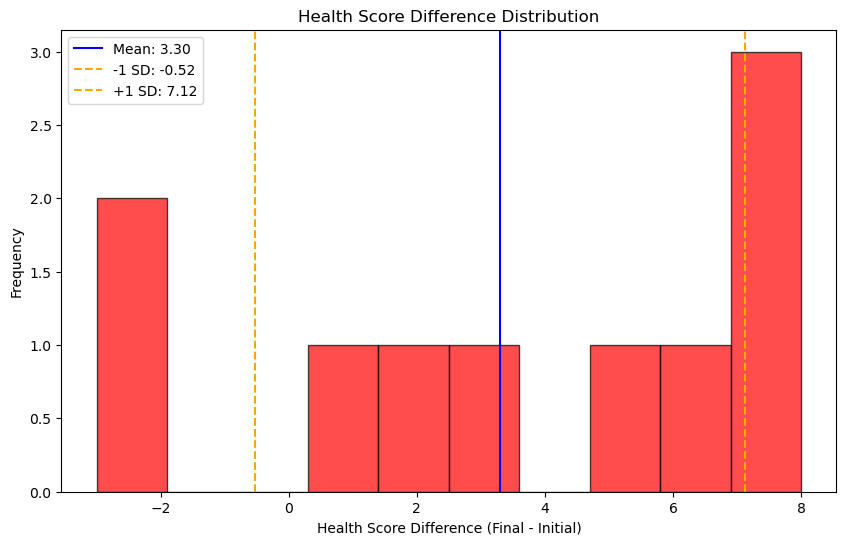

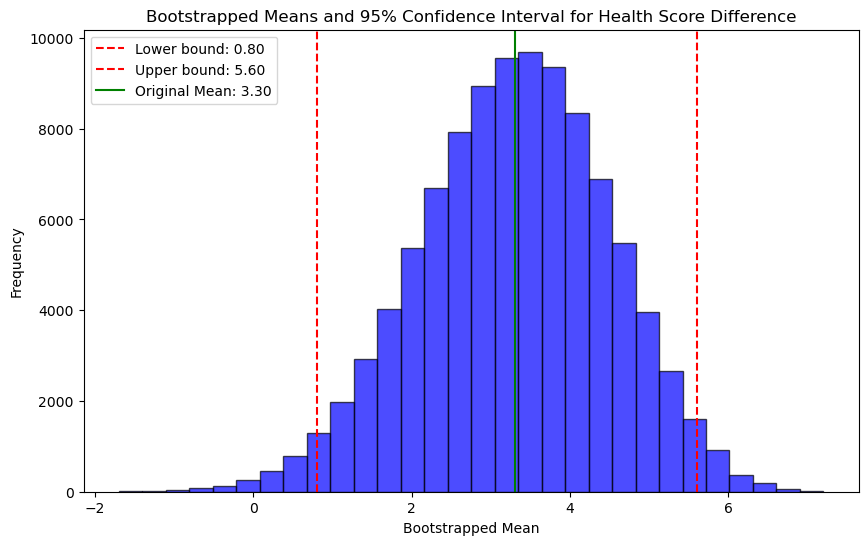

Confidence Interval for Health Score Difference: (0.8, 5.6)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the CSV data
data_dict = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Save DataFrame to CSV
csv_filename = 'patient_data.csv'
data.to_csv(csv_filename, index=False)

# Calculate the difference between Final and Initial Health Scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']
difference_data = data['HealthScoreDifference'].values

# Visualize the original data with a histogram
plt.figure(figsize=(10, 6))

# Plot the histogram of the difference
plt.hist(difference_data, bins=10, color='red', alpha=0.7, edgecolor='black')

# Add mean and standard deviation lines
plt.axvline(x=np.mean(difference_data), color='blue', linestyle='-', label=f'Mean: {np.mean(difference_data):.2f}')
plt.axvline(x=np.mean(difference_data) - np.std(difference_data), color='orange', linestyle='--', label=f'-1 SD: {np.mean(difference_data) - np.std(difference_data):.2f}')
plt.axvline(x=np.mean(difference_data) + np.std(difference_data), color='orange', linestyle='--', label=f'+1 SD: {np.mean(difference_data) + np.std(difference_data):.2f}')

# Add labels and title
plt.title('Health Score Difference Distribution')
plt.xlabel('Health Score Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Number of bootstrap samples
B = 100000

# Array to store the bootstrapped means
bootstrapped_means = []

# Bootstrapping
for _ in range(B):
    # Resample with replacement from the difference dataset
    bootstrap_sample = np.random.choice(difference_data, size=len(difference_data), replace=True)
    # Compute the mean of the bootstrap sample
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Convert to numpy array
bootstrapped_means = np.array(bootstrapped_means)

# Compute the 95% confidence interval using np.quantile()
lower_bound = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile
upper_bound = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile
confidence_interval = (lower_bound, upper_bound)

# Visualize the bootstrapped means and the confidence interval
plt.figure(figsize=(10, 6))

# Plot the distribution of the bootstrapped means
plt.hist(bootstrapped_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
plt.axvline(x=np.mean(difference_data), color='green', linestyle='-', label=f'Original Mean: {np.mean(difference_data):.2f}')

# Add labels and title
plt.title('Bootstrapped Means and 95% Confidence Interval for Health Score Difference')
plt.xlabel('Bootstrapped Mean')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Output the calculated confidence interval
print("Confidence Interval for Health Score Difference:", confidence_interval)
